# Mid Bootcamp Classification Project

## Scenario and Objective

- You are working as a risk analyst with a bank. Apart from the other banking and loan services, the bank also provides credit card services that are a very important source of revenue for the bank. 
- The bank wants to understand the **demographics and other characteristics of its customers that accept a credit card offer** and that do not accept a credit card.

- **Build a model that will provide insight into why some bank customers accept credit card offers.** There are also other potential areas of opportunities that the bank wants to understand from the data.

## Initial Setup

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the CSV file

In [2]:
df = pd.read_excel('creditcardmarketing.xlsx')

### Normalising column header names

In [3]:
df.columns = ['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance']

In [4]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

## Exploratory Data Analysis

In [5]:
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,no_bank_accounts_open,overdraft_protection,credit_rating,no_credit_cards_held,no_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [6]:
# We can see 24 null values which we will need to address...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_number        18000 non-null  int64  
 1   offer_accepted         18000 non-null  object 
 2   reward                 18000 non-null  object 
 3   mailer_type            18000 non-null  object 
 4   income_level           18000 non-null  object 
 5   no_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection   18000 non-null  object 
 7   credit_rating          18000 non-null  object 
 8   no_credit_cards_held   18000 non-null  int64  
 9   no_homes_owned         18000 non-null  int64  
 10  household_size         18000 non-null  int64  
 11  own_your_home          18000 non-null  object 
 12  average_balance        17976 non-null  float64
 13  q1_balance             17976 non-null  float64
 14  q2_balance             17976 non-null  float64
 15  q3

In [7]:
df.describe()

,customer_number,no_bank_accounts_open,no_credit_cards_held,no_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [8]:
# Looking at the number of credit card offers accepted or rejected.
# We can see that this is a highly imbalanced data set, which will need adjusting.

df['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

## Inital Data Cleaning

### Dealing with null values

In [9]:
# We replace the null values with the average figure for that column.
# This is so that we do not have to drop these rows and lose the other data which may be useful.

df['average_balance'] = df['average_balance'].fillna(df['average_balance'].mean())
df['q1_balance'] = df['q1_balance'].fillna(df['q1_balance'].mean())
df['q2_balance'] = df['q2_balance'].fillna(df['q2_balance'].mean())
df['q3_balance'] = df['q3_balance'].fillna(df['q3_balance'].mean())
df['q4_balance'] = df['q4_balance'].fillna(df['q4_balance'].mean())

### Dropping customer_number

In [10]:
# This is simpy noise in the data and will not be a helpful indicator of acceptance.

df.drop('customer_number', axis=1, inplace=True)

## Checking for multicolinearity

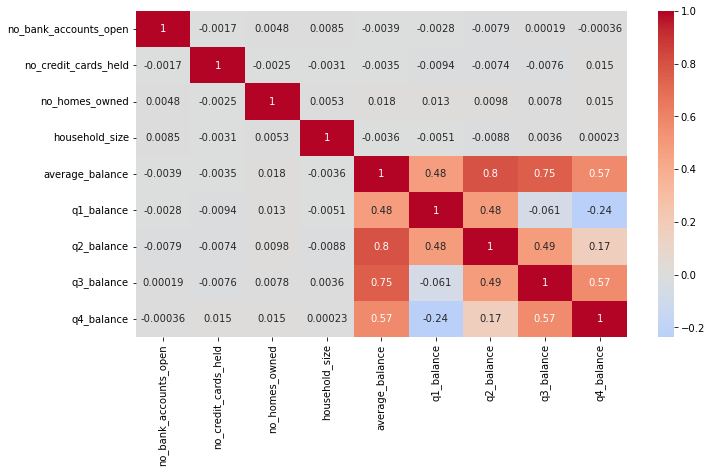

In [11]:
# q2 balance is quite highly corrrelated with average balance.
# However when we dropped average balance in other tests not shown here, 
# The accuracy decreased and so we have chosen to keep all the data.

plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', center=0);

## Data Wrangling

### Feature Engineering

In [12]:
# This column shows the difference between whether there has been an increase or decrease
# in a customer's balance from the start to the end of the year
# In our tests, it marginally improves models.

df['trend'] = df['q4_balance'] - df['q1_balance']
df['trend'] = df['trend'].apply(lambda x:'up'if x>0 else 'down')


In [13]:
# This column shows the average balance divided by the household size.
# We thought that there may be some connection between family size and balance which 
# could predict acceptance.
# Our models were very slightly improved by this addition.

df['capita'] = df['average_balance']/df['household_size']

### Changing some columns to categorical

In [14]:
# These columns appear to more logically categorised as categorical columns.

df['no_bank_accounts_open'] = df['no_bank_accounts_open'].astype('object')
df['no_credit_cards_held'] = df['no_credit_cards_held'].astype('object')
df['no_homes_owned'] = df['no_homes_owned'].astype('object')
df['household_size'] = df['household_size'].astype('object')

## Continued Exploratory Data Analysis

In [15]:
# We can see that the results where an offer has been accepted are very mixed in with where it has been 
# rejected. This suggests that our model will not have very high accuracy and that if it did,
# it would probably have been overfitted to the data.

#sns.pairplot(df, kind='scatter', hue='offer_accepted')

### Chi-squared

In [16]:
from scipy.stats import chi2_contingency

In [17]:
contingency= pd.crosstab(df['credit_rating'], df['offer_accepted']) 

In [18]:
#plt.figure(figsize=(12,8)) 
#sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [19]:
# Here we can see the p-values for the chi-squared analysis.
# A value of below 0.05 means that we can reject the null hypothesis that the variable has no effect on 
# offer accepted.

# From the results below we can say that: 
# credit_rating, mailer_type, income_level, reward and household_size
# are not insignificant when it comes to assessing whether an offer will be accepted or not.

for x in df.columns:
    contingency= pd.crosstab(df[x], df['offer_accepted'])
    print('chi_squared p-value for',x, 'is', chi2_contingency(contingency, correction=False)[1])

chi_squared p-value for offer_accepted is 0.0
chi_squared p-value for reward is 7.103826919269613e-23
chi_squared p-value for mailer_type is 4.1914413632040166e-39
chi_squared p-value for income_level is 1.463496214215802e-25
chi_squared p-value for no_bank_accounts_open is 0.5787148519062763
chi_squared p-value for overdraft_protection is 0.7040047254941093
chi_squared p-value for credit_rating is 5.967269417919421e-97
chi_squared p-value for no_credit_cards_held is 0.7191405379088973
chi_squared p-value for no_homes_owned is 0.8816359414526597
chi_squared p-value for household_size is 0.0004550923324748873
chi_squared p-value for own_your_home is 0.9673462118280213
chi_squared p-value for average_balance is 0.742456654640453
chi_squared p-value for q1_balance is 0.9457615612955838
chi_squared p-value for q2_balance is 0.867193996078398
chi_squared p-value for q3_balance is 0.15815571380942853
chi_squared p-value for q4_balance is 0.022108533606291208
chi_squared p-value for trend is 

## Pre-Processing

### Splitting data into numerical and categorical values and a target variable

In [20]:
X = df.select_dtypes(include=np. number)
cat = df.select_dtypes(include=object)
cat.drop('offer_accepted', axis=1, inplace=True)
y = df['offer_accepted']

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Outliers

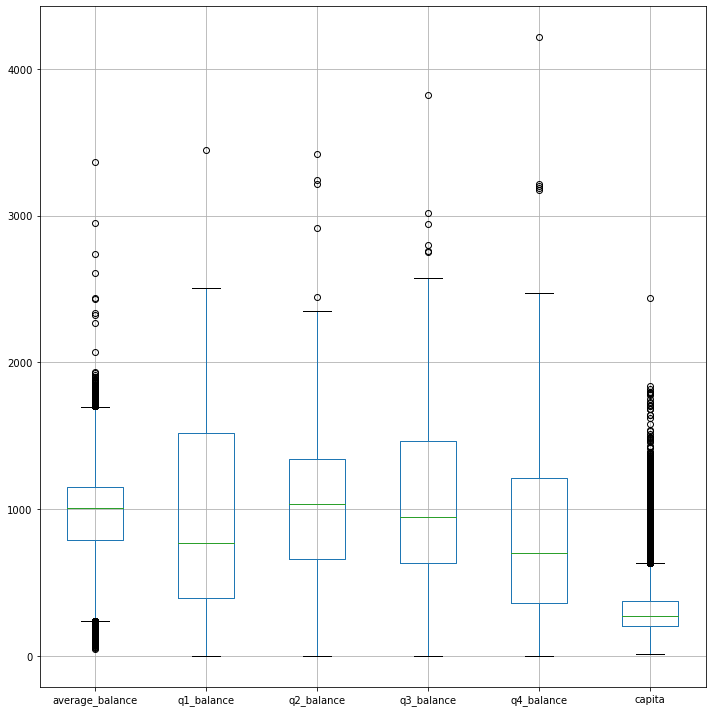

In [21]:
# We decided not to drop outliers after finding that most models were less accurate without the extra detail.

plt.figure(figsize=(10, 10))
df.boxplot()
plt.tight_layout()

In [22]:
#import scipy.stats as stats
#from scipy.stats import zscore

In [23]:
#z_scores = stats.zscore(df.select_dtypes(include=np.number))
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#df = df[filtered_entries]

In [24]:
#df.reset_index(drop=True, inplace=True)

### Scaling numerical data

In [25]:
#sns.pairplot(X)

In [26]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [27]:
# Using min-max scaler appears to make very little difference so we went for the standard scaler

normalizer = Normalizer()
normalizer.fit(X)
x_scaled = normalizer.transform(X)
x = pd.DataFrame(x_scaled, columns = X.columns)

In [28]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)

In [29]:
#sns.pairplot(x)

### Getting dummies for categorical data

In [30]:
categorical = pd.get_dummies(cat, drop_first=True)

In [31]:
categorical

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,no_bank_accounts_open_2,no_bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,...,no_homes_owned_3,household_size_2,household_size_3,household_size_4,household_size_5,household_size_6,household_size_8,household_size_9,own_your_home_Yes,trend_up
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
2,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
17996,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
17997,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
17998,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1


### Concatenating data

In [32]:
x_full = pd.concat([x, categorical], axis=1)

## Model Candidate 1 - Logistic Regression

In [33]:
# Using this model achieves a high accuracy because of the imbalance in the data.
# It is therefore not a useful model to use in predictions

In [34]:
# importing the models and metrics we will use

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [36]:
lr = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_pred =lr.predict(X_test)

In [37]:
y_train.value_counts()

No     11862
Yes      738
Name: offer_accepted, dtype: int64

In [38]:
accuracy_score(y_pred, y_test)

0.9472222222222222

In [39]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947222,0.0,0.947222,0.473611,0.897230
recall,1.000000,0.0,0.947222,0.500000,0.947222
f1-score,0.972896,0.0,0.947222,0.486448,0.921549
support,5115.000000,285.0,0.947222,5400.000000,5400.000000


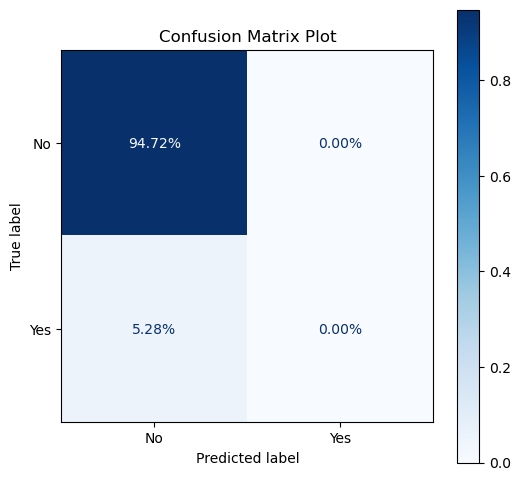

In [40]:
# we can see that the model has always said that customers will not accept a card

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap = 'Blues');

### ROC Plot

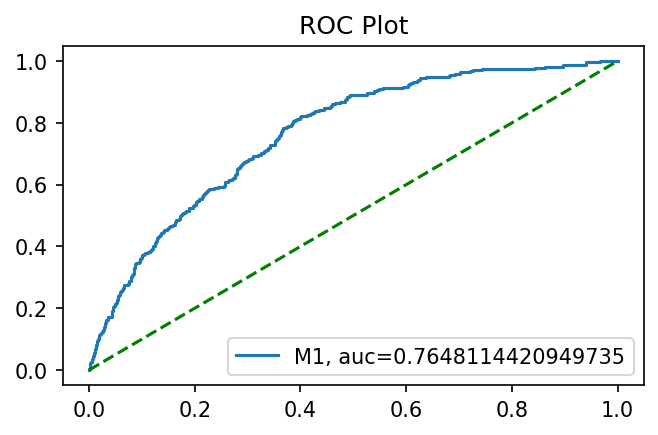

In [41]:
import sklearn.metrics as metrics
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Model Candidate 2 - Logistic Regression with Smote

In [42]:
# here we have used smote to oversample the minority class (on the training data)
# this model has much lower accuracy than the first, but is more balanced
# it is predicting some true positives correctly.

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [44]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [45]:
# checking for balance
y_train_sm.value_counts()

Yes    11862
No     11862
Name: offer_accepted, dtype: int64

In [46]:
lr = LogisticRegression(max_iter=400).fit(X_train_sm, y_train_sm)
y_pred_sm =lr.predict(X_test)

In [47]:
accuracy_score(y_test ,y_pred_sm)

0.755

In [48]:
pd.DataFrame(classification_report(y_test, y_pred_sm, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.959748,0.093260,0.755,0.526504,0.914017
recall,0.773803,0.417544,0.755,0.595673,0.755000
f1-score,0.856803,0.152466,0.755,0.504635,0.819629
support,5115.000000,285.000000,0.755,5400.000000,5400.000000


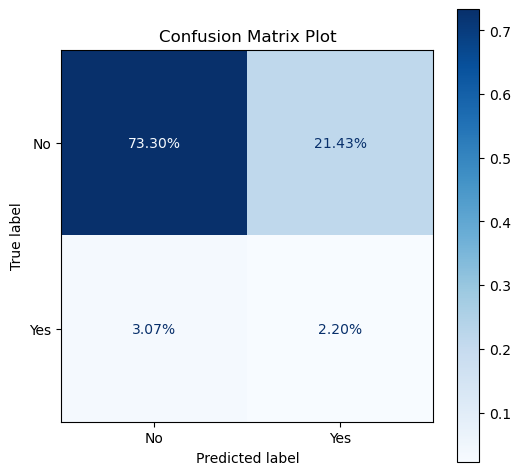

In [49]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

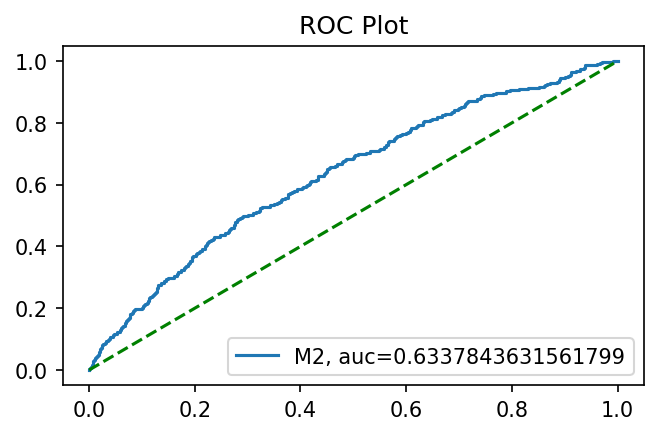

In [50]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M2, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Canididate Model 3 - Logistic Regression with Tomek Links

In [51]:
# Here we have used tomek links to undersample the majority class.
# This model offers no real improvement over the first.

In [52]:
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy='majority')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [54]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [55]:
y_train_tk.value_counts()

No     11553
Yes      738
Name: offer_accepted, dtype: int64

In [56]:
lr.fit(X_train_tk, y_train_tk)
y_pred_tk = lr.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred_tk)

0.9472222222222222

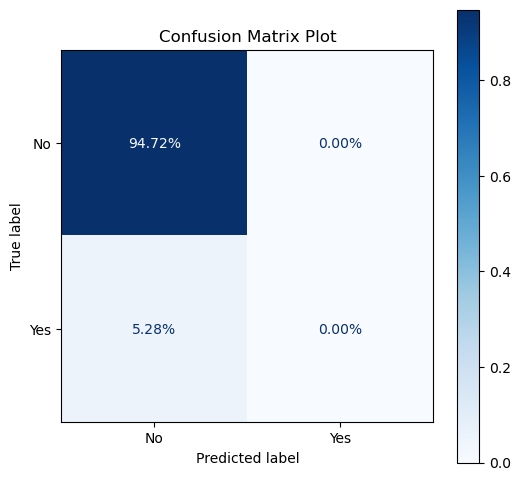

In [58]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

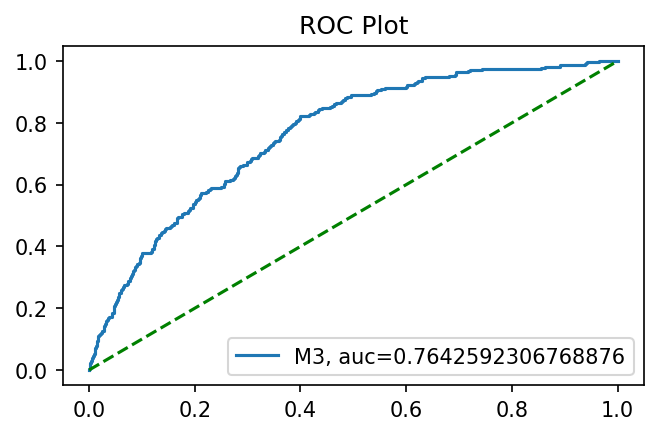

In [59]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M3, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 4 - Logistic Regression with Smote and Tomek together

In [60]:
# this model uses a combination tomek and smote with logistic regression to achieve a good balance
# between accuracy and true positives

# we consider this model to be the best if costs are not a very important factor...

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [62]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [63]:
y_train_tk.value_counts()

No     11553
Yes      738
Name: offer_accepted, dtype: int64

In [64]:
X_train_tk_sm, y_train_tk_sm = smote.fit_resample(X_train_tk, y_train_tk)

In [65]:
y_train_tk_sm.value_counts()

Yes    11553
No     11553
Name: offer_accepted, dtype: int64

In [66]:
lr = LogisticRegression(max_iter=400).fit(X_train_tk_sm, y_train_tk_sm)
y_pred_tk_sm = lr.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred_tk_sm)

0.7514814814814815

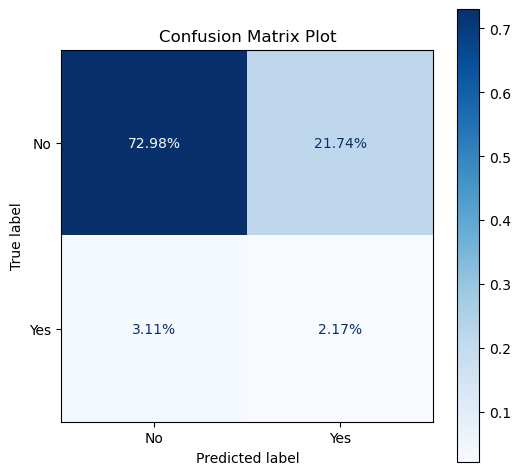

In [68]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

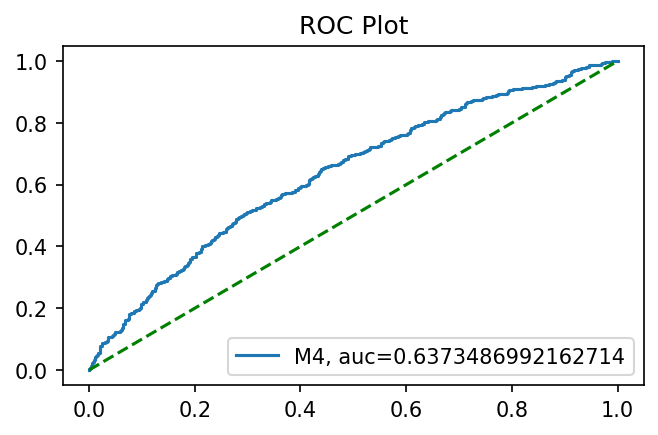

In [69]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M4, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 5 - K Nearest Neighbours with Smote + Tomek

In [70]:
# in this model we used k nearest neighbours with smote and tomek
# this model produces more false positives than the previous model without any increase in
# true positives

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
kn = KNeighborsClassifier(n_neighbors=5, p=3)
kn.fit(X_train_tk_sm, y_train_tk_sm)
y_pred_kn = kn.predict(X_test)

In [73]:
accuracy_score(y_test ,y_pred_kn)


0.7146296296296296

In [74]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.954245,0.071623,0.71463,0.512934,0.907662
recall,0.733920,0.368421,0.71463,0.551170,0.714630
f1-score,0.829705,0.119931,0.71463,0.474818,0.792245
support,5115.000000,285.000000,0.71463,5400.000000,5400.000000


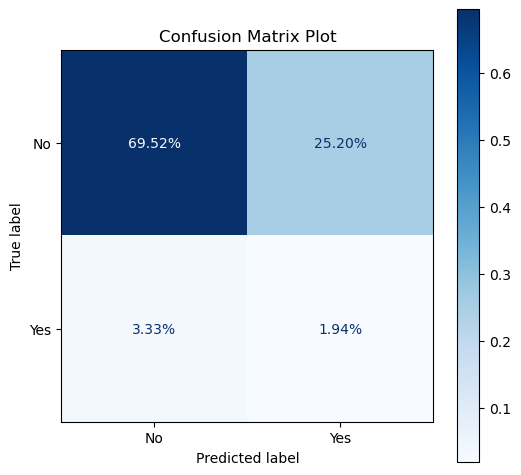

In [75]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

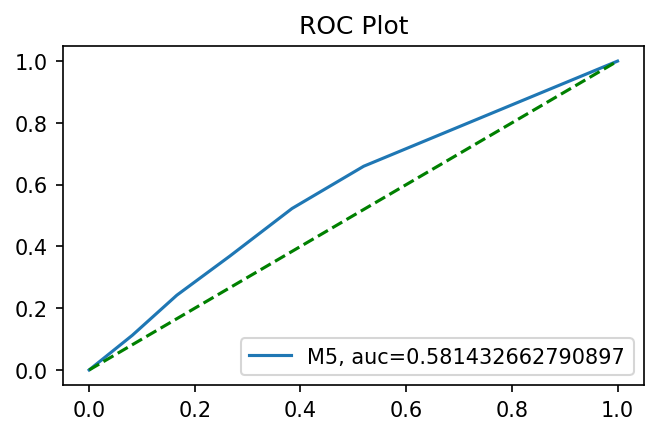

In [76]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = kn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M5, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 6 - Random Forest with smote + tomek

In [77]:
# this model combines random forest with smote and tomek
# it is a good model to reduce costs, with a low false positve rate
# however it is not very good at predicting true postives.

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf=RandomForestClassifier(n_estimators=10)

rf.fit(X_train_tk_sm,y_train_tk_sm)

y_pred_rf=rf.predict(X_test)

In [80]:
accuracy_score(y_test ,y_pred_rf)

0.8937037037037037

In [81]:
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.951123,0.106267,0.893704,0.528695,0.906533
recall,0.935875,0.136842,0.893704,0.536358,0.893704
f1-score,0.943437,0.119632,0.893704,0.531535,0.899959
support,5115.000000,285.000000,0.893704,5400.000000,5400.000000


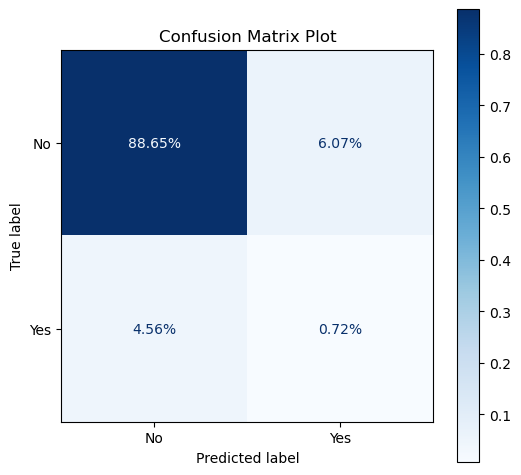

In [82]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

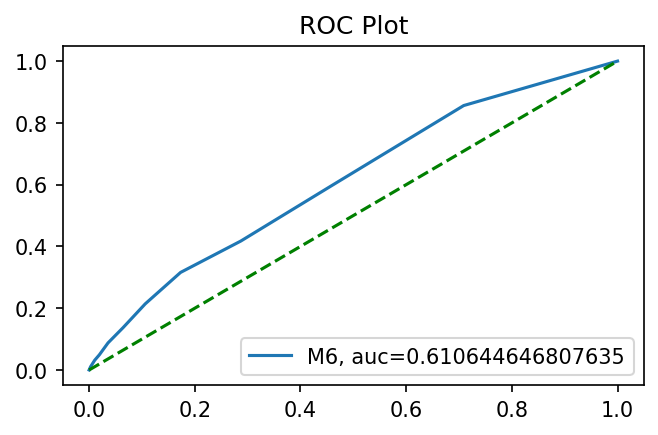

In [83]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M6, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 7 - Logistic Regression with random oversampling

In [84]:
# here we used logistic regression combined with the random oversampler
# this model is only a slight improvement over the original model
# although it has a high accuracy, it tells us almost nothing about the who will accept a credit card

# this model provides little insight into real world applications

In [85]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [87]:
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

In [88]:
rf=RandomForestClassifier(n_estimators=10)

rf.fit(X_train_os,y_train_os)

y_pred_rf_os=rf.predict(X_test)

In [89]:
y_train_os.value_counts()

Yes    11862
No     11862
Name: offer_accepted, dtype: int64

In [90]:
accuracy_score(y_pred_rf_os, y_test)

0.9427777777777778

In [91]:
pd.DataFrame(classification_report(y_test, y_pred_rf_os, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947820,0.147059,0.942778,0.547439,0.905557
recall,0.994330,0.017544,0.942778,0.505937,0.942778
f1-score,0.970518,0.031348,0.942778,0.500933,0.920951
support,5115.000000,285.000000,0.942778,5400.000000,5400.000000


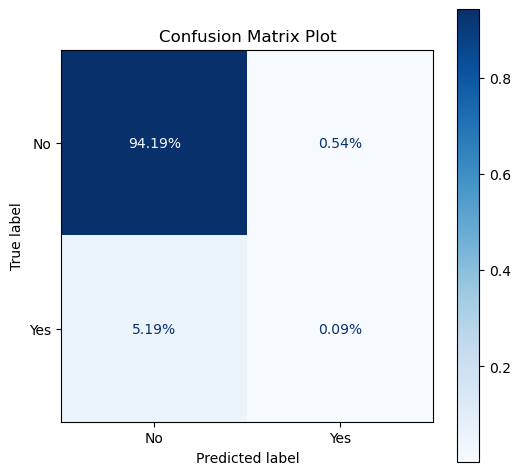

In [92]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

### ROC Plot

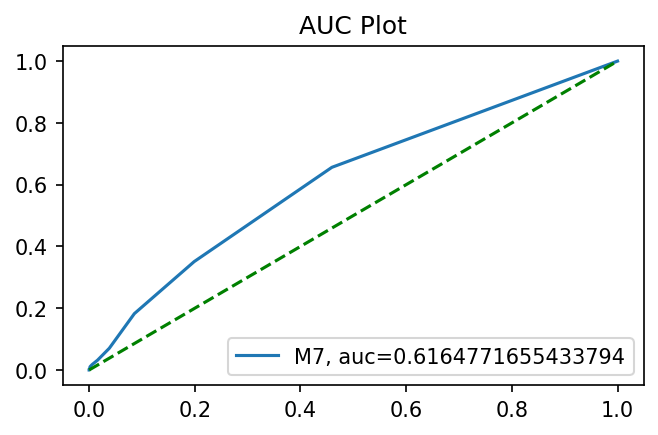

In [93]:
import sklearn.metrics as metrics
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M7, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);